In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [20]:
scenario_df = pd.read_csv("../scenario_master_list.csv")
scenario_df = scenario_df[scenario_df["archetype"]=="Southern"].reset_index(drop=True)

In [67]:
df = pd.read_csv("endpoints_89c91f5f-598f-eb11-a2ce-c4346bcb1550.csv")
df_baseline = df[df["scenario_number"]==28].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
df_allout = df[df["scenario_number"]==27].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()

In [7]:
df.columns

Index(['pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr15_500', 'pfpr_all',
       'annual_incidence0_5', 'annual_incidence2_10', 'annual_incidence6_15',
       'annual_incidence15_500', 'annual_incidence_all', 'pop0_5', 'pop2_10',
       'pop6_15', 'pop15_500', 'pop_all', 'sim_id', 'archetype',
       'burnin_approx_pfpr2_10', 'burnin_habitat_scale', 'drug_type',
       'exe_collection_id', 'hs_rate', 'input_collection_id', 'interval',
       'itn_coverage', 'out_of_school_rate', 'Run_Number', 'scenario_number',
       'screen_type', 'within_school_coverage'],
      dtype='object')

In [8]:
df_baseline.groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()

,burnin_approx_pfpr2_10,pfpr0_5,pfpr2_10,pfpr6_15,pfpr15_500,pfpr_all,annual_incidence0_5,annual_incidence2_10,annual_incidence6_15,annual_incidence15_500,...,pop0_5,pop2_10,pop6_15,pop15_500,pop_all,burnin_habitat_scale,out_of_school_rate,Run_Number,scenario_number,within_school_coverage
0,0.05,0.047026,0.106124,0.155180,0.133674,0.124428,0.817742,1.037791,1.132698,0.565008,...,799.427397,1123.863014,1088.477626,2980.780822,4997.715982,7.1,0.0,1,28,0.9
1,0.15,0.123848,0.223618,0.292074,0.185838,0.202040,2.021822,2.115604,1.914895,0.567800,...,800.229224,1164.968950,1139.091324,2937.540639,5023.595434,7.7,0.0,1,28,0.9
2,0.25,0.191972,0.309206,0.378221,0.203843,0.244494,2.968998,2.894648,2.287105,0.435347,...,812.055708,1153.631050,1087.517808,2923.341553,4968.775342,8.2,0.0,1,28,0.9
3,0.35,0.263457,0.389137,0.454796,0.219453,0.284841,4.041549,3.548617,2.474805,0.332482,...,789.352511,1135.437443,1111.891324,2938.457534,4990.544292,8.6,0.0,1,28,0.9


In [28]:
foo = df.groupby(["scenario_number", "burnin_approx_pfpr2_10"]).agg("mean").reset_index().merge(scenario_df, on="scenario_number", suffixes=("","_y"))

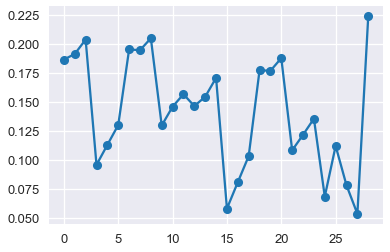

In [29]:
bar = foo[foo["burnin_approx_pfpr2_10"]==0.15]
plt.plot(bar["scenario_number"], bar["pfpr2_10"], marker='o')
# sns.boxplot(x="scenario_number", y="pfpr2_10",data=bar)

<AxesSubplot:xlabel='drug_type', ylabel='pfpr2_10'>

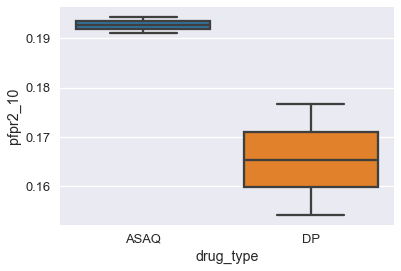

In [33]:
sdf = bar[np.logical_and.reduce([
#     bar["screen_type"] == "IPT",
    bar["interval"] == "term",
    bar["itn_coverage"] == "default",
    bar["hs_rate"] == "default",
    bar["within_school_coverage"] == 0.9,
    bar["out_of_school_rate"] == 0.15
])]

sns.boxplot(x="drug_type",y="pfpr2_10",data=sdf)

<AxesSubplot:xlabel='drug_type', ylabel='pfpr2_10'>

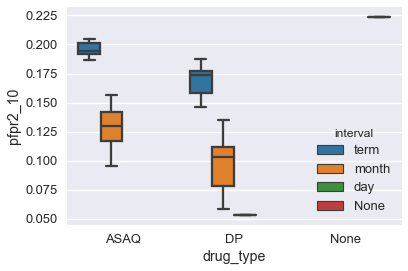

In [26]:
sns.boxplot(x="drug_type",y="pfpr2_10",hue="interval",data=bar)

,burnin_approx_pfpr2_10,pfpr0_5,pfpr2_10,pfpr6_15,pfpr15_500,pfpr_all,annual_incidence0_5,annual_incidence2_10,annual_incidence6_15,annual_incidence15_500,...,pop0_5,pop2_10,pop6_15,pop15_500,pop_all,burnin_habitat_scale,out_of_school_rate,Run_Number,scenario_number,within_school_coverage
0,0.05,0.047026,0.106124,0.155180,0.133674,0.124428,0.817742,1.037791,1.132698,0.565008,...,799.427397,1123.863014,1088.477626,2980.780822,4997.715982,7.1,0.0,1,28,0.9
1,0.15,0.123848,0.223618,0.292074,0.185838,0.202040,2.021822,2.115604,1.914895,0.567800,...,800.229224,1164.968950,1139.091324,2937.540639,5023.595434,7.7,0.0,1,28,0.9
2,0.25,0.191972,0.309206,0.378221,0.203843,0.244494,2.968998,2.894648,2.287105,0.435347,...,812.055708,1153.631050,1087.517808,2923.341553,4968.775342,8.2,0.0,1,28,0.9
3,0.35,0.263457,0.389137,0.454796,0.219453,0.284841,4.041549,3.548617,2.474805,0.332482,...,789.352511,1135.437443,1111.891324,2938.457534,4990.544292,8.6,0.0,1,28,0.9


(0.0, 0.4)

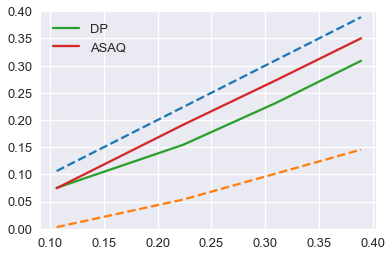

In [69]:
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_baseline["pfpr2_10"]), linestyle='dashed')
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_allout["pfpr2_10"]), linestyle='dashed')

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="DP")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "ASAQ",
    df["screen_type"] == "IPT",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="ASAQ")
plt.legend()

plt.ylim([0,0.4])

(0.0, 0.4)

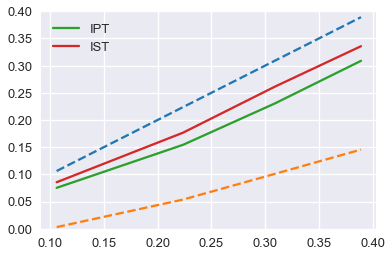

In [70]:
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_baseline["pfpr2_10"]), linestyle='dashed')
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_allout["pfpr2_10"]), linestyle='dashed')

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="IPT")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IST",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="IST")
plt.legend()

plt.ylim([0,0.4])

(0.0, 0.4)

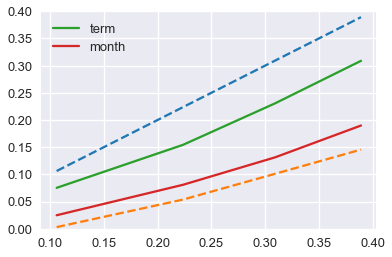

In [71]:
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_baseline["pfpr2_10"]), linestyle='dashed')
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_allout["pfpr2_10"]), linestyle='dashed')

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="term")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "month",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="month")
plt.legend()

plt.ylim([0,0.4])

(0.0, 0.4)

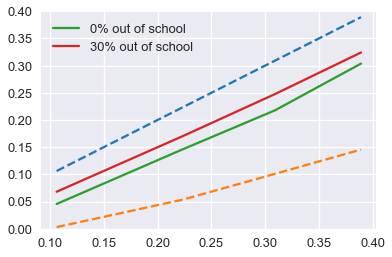

In [72]:
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_baseline["pfpr2_10"]), linestyle='dashed')
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_allout["pfpr2_10"]), linestyle='dashed')

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="0% out of school")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.3
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="30% out of school")
plt.legend()

plt.ylim([0,0.4])

Text(0, 0.5, 'PfPR2-10 with IPTsc')

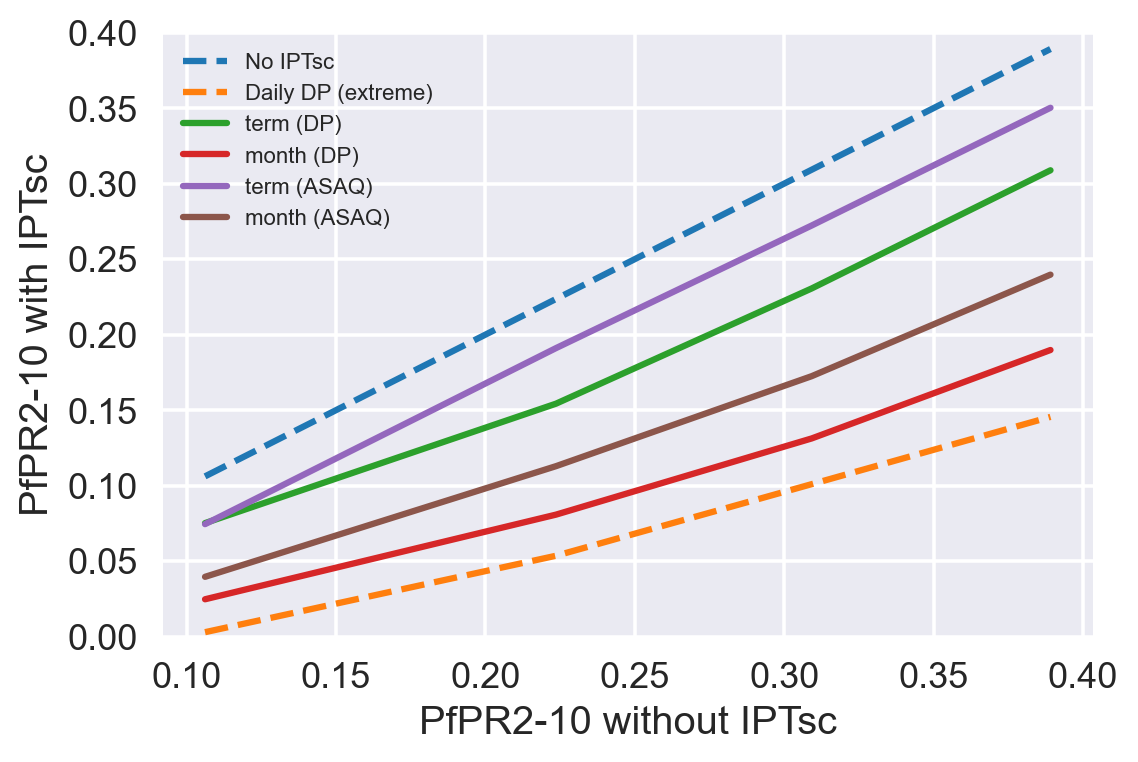

In [199]:
plt.figure(dpi=200)
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_baseline["pfpr2_10"]), linestyle='dashed', label="No IPTsc")
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_allout["pfpr2_10"]), linestyle='dashed', label="Daily DP (extreme)")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="term (DP)")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "month",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="month (DP)")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "ASAQ",
    df["screen_type"] == "IPT",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="term (ASAQ)")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "ASAQ",
    df["screen_type"] == "IPT",
    df["interval"] == "month",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="month (ASAQ)")


plt.legend(fontsize=8)
plt.ylim([0,0.4])
plt.xlabel("PfPR2-10 without IPTsc")
plt.ylabel("PfPR2-10 with IPTsc")

(0.0, 0.4)

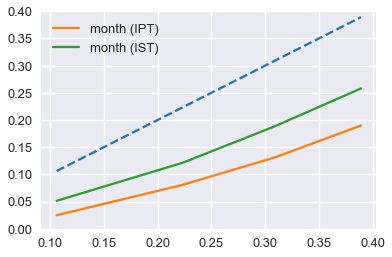

In [66]:
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_baseline["pfpr2_10"]), linestyle='dashed')

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "month",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="month (IPT)")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IST",
    df["interval"] == "month",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(sdf["pfpr2_10"]), label="month (IST)")


plt.legend()
plt.ylim([0,0.4])

Text(0.5, 0, 'pfpr_all')

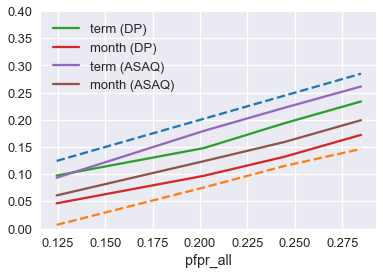

In [75]:
plt.plot(np.array(df_baseline["pfpr_all"]), np.array(df_baseline["pfpr_all"]), linestyle='dashed')
plt.plot(np.array(df_baseline["pfpr_all"]), np.array(df_allout["pfpr_all"]), linestyle='dashed')

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr_all"]), np.array(sdf["pfpr_all"]), label="term (DP)")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "DP",
    df["screen_type"] == "IPT",
    df["interval"] == "month",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr_all"]), np.array(sdf["pfpr_all"]), label="month (DP)")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "ASAQ",
    df["screen_type"] == "IPT",
    df["interval"] == "term",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr_all"]), np.array(sdf["pfpr_all"]), label="term (ASAQ)")

sdf = df[np.logical_and.reduce([
    df["drug_type"] == "ASAQ",
    df["screen_type"] == "IPT",
    df["interval"] == "month",
    df["itn_coverage"] == "default",
    df["hs_rate"] == "default",
    df["within_school_coverage"] == 0.9,
    df["out_of_school_rate"] == 0.15
])].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
plt.plot(np.array(df_baseline["pfpr_all"]), np.array(sdf["pfpr_all"]), label="month (ASAQ)")


plt.legend()
plt.ylim([0,0.4])
plt.xlabel("pfpr_all")

In [76]:
df.columns

Index(['pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr15_500', 'pfpr_all',
       'annual_incidence0_5', 'annual_incidence2_10', 'annual_incidence6_15',
       'annual_incidence15_500', 'annual_incidence_all', 'pop0_5', 'pop2_10',
       'pop6_15', 'pop15_500', 'pop_all', 'sim_id', 'archetype',
       'burnin_approx_pfpr2_10', 'burnin_habitat_scale', 'drug_type',
       'exe_collection_id', 'hs_rate', 'input_collection_id', 'interval',
       'itn_coverage', 'out_of_school_rate', 'Run_Number', 'scenario_number',
       'screen_type', 'within_school_coverage'],
      dtype='object')

## Combinatorial

In [ ]:
# could make more seeds, to show actual boxplot

<AxesSubplot:xlabel='burnin_approx_pfpr2_10', ylabel='pfpr2_10'>

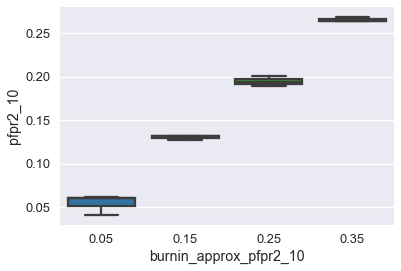

In [83]:
sdf = df[df["scenario_number"]==5]
sns.boxplot(x="burnin_approx_pfpr2_10", y="pfpr2_10", data=sdf)

<AxesSubplot:xlabel='burnin_approx_pfpr2_10', ylabel='pfpr2_10'>

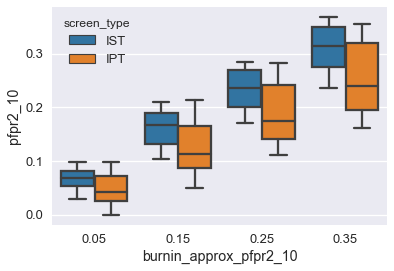

In [93]:
sdf = df[df["scenario_number"]<27]
sns.boxplot(x="burnin_approx_pfpr2_10", y="pfpr2_10", hue="screen_type",data=sdf)

<AxesSubplot:xlabel='burnin_approx_pfpr2_10', ylabel='pfpr2_10'>

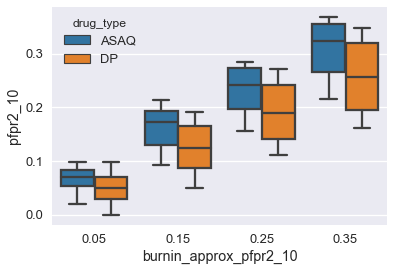

In [92]:
sdf = df[df["scenario_number"]<27]
sns.boxplot(x="burnin_approx_pfpr2_10", y="pfpr2_10", hue="drug_type",data=sdf)

<AxesSubplot:xlabel='burnin_approx_pfpr2_10', ylabel='pfpr2_10'>

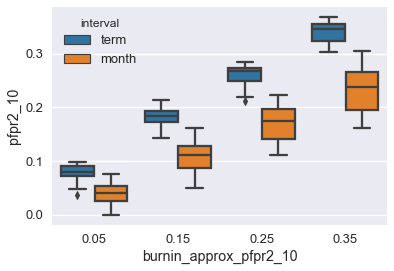

In [94]:
sdf = df[df["scenario_number"]<27]
sns.boxplot(x="burnin_approx_pfpr2_10", y="pfpr2_10", hue="interval",data=sdf)

In [96]:
for drug_type in ["DP", "ASAQ"]:
    for interval in ["month", "term"]:
        for screen_type in ["IPT", "IST"]:
            sdf = df[np.logical_and.reduce([
                df["out_of_school_rate"] == 0,
                df["drug_type"] == drug_type,
                df["interval"] == interval,
                df["screen_type"] == screen_type
            ])]
            
            plt.figure(dpi=200)
            sns.boxplot(x="burnin_approx_pfpr2_10", y="pfpr2_10", data=sdf)
            plt.savefig("figures/{}_{}_{}.png".format(drug_type, interval, screen_type))
            plt.close("all")

In [ ]:
df = df.merge(df_baseline[["burnin_approx_pfpr2_10", "pfpr2_10"]].rename(columns={"pfpr2_10": "BASELINE_pfpr2_10"}), how="left", on="burnin_approx_pfpr2_10")

In [124]:
df["intervention_name"] = df["drug_type"] + "_" + df["screen_type"] +"_" + df["interval"]
df["scratch"] = df["pfpr2_10"]/df["BASELINE_pfpr2_10"]

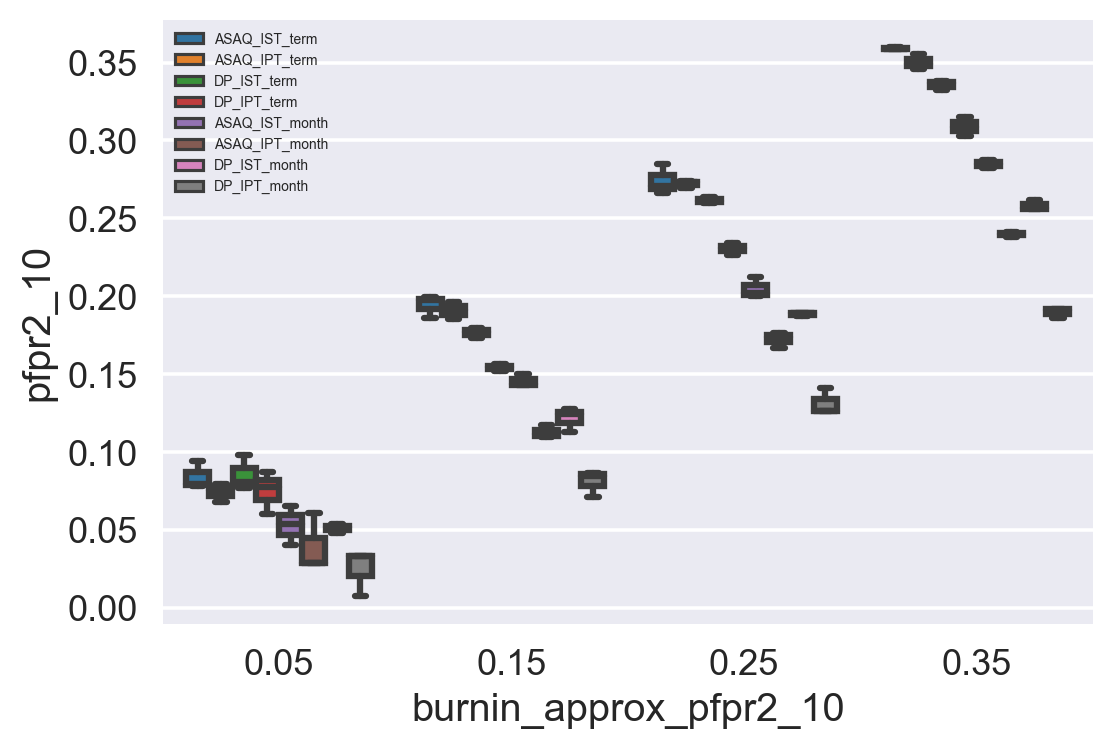

In [118]:
sdf = df[np.logical_and.reduce([df["out_of_school_rate"]==0.15,
                        df["itn_coverage"]=="default",
                        df["hs_rate"]=="default",
                               df["within_school_coverage"]==0.9])]
plt.figure(dpi=200)
hue_order = [
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "DP_IPT_term",
    "ASAQ_IST_month",
    "ASAQ_IPT_month",
    "DP_IST_month",
    "DP_IPT_month"
]
sns.boxplot(x="burnin_approx_pfpr2_10", y="pfpr2_10", hue="intervention_name",data=sdf,hue_order=hue_order)
plt.legend(fontsize=5)
# plt.savefig("figures/{}_{}_{}.png".format(drug_type, interval, screen_type))
# plt.close("all")

Text(0, 0.5, 'Fraction reduction of baseline PfPR2-10')

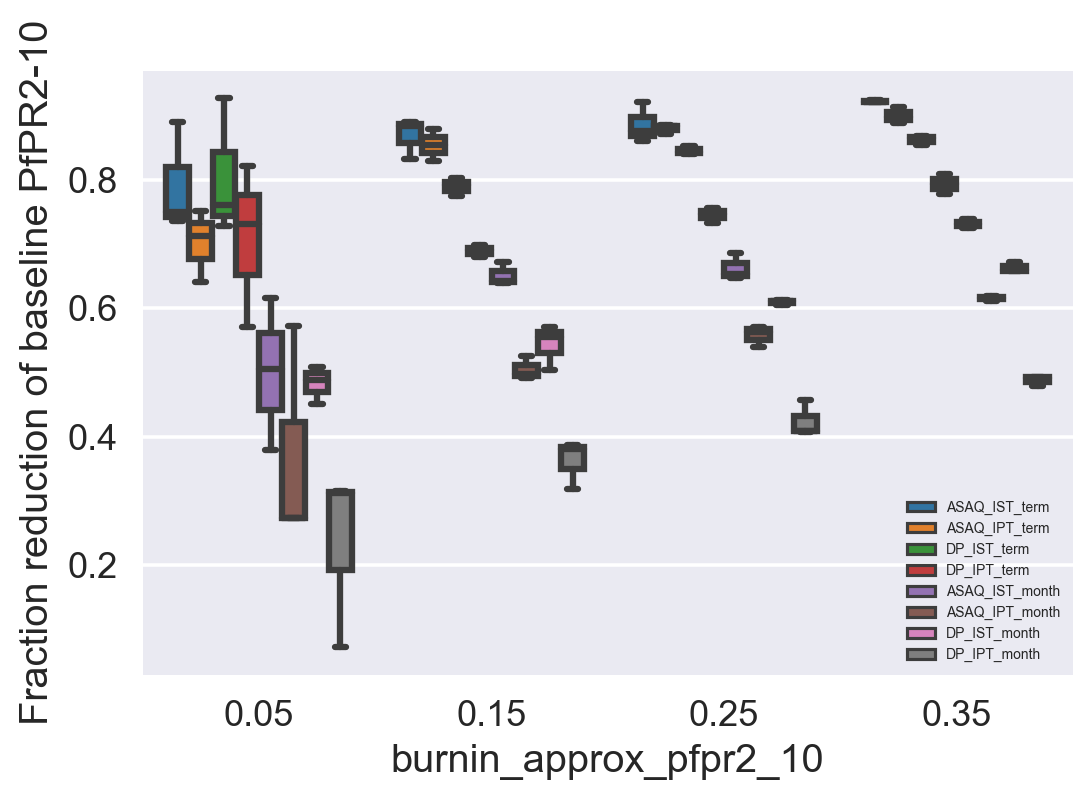

In [126]:
sdf = df[np.logical_and.reduce([df["out_of_school_rate"]==0.15,
                        df["itn_coverage"]=="default",
                        df["hs_rate"]=="default",
                               df["within_school_coverage"]==0.9])]
plt.figure(dpi=200)
hue_order = [
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "DP_IPT_term",
    "ASAQ_IST_month",
    "ASAQ_IPT_month",
    "DP_IST_month",
    "DP_IPT_month"
]
sns.boxplot(x="burnin_approx_pfpr2_10", y="scratch", hue="intervention_name",data=sdf,hue_order=hue_order)
plt.legend(fontsize=5)
# plt.savefig("figures/{}_{}_{}.png".format(drug_type, interval, screen_type))
# plt.close("all")
plt.ylabel("Fraction reduction of baseline PfPR2-10")

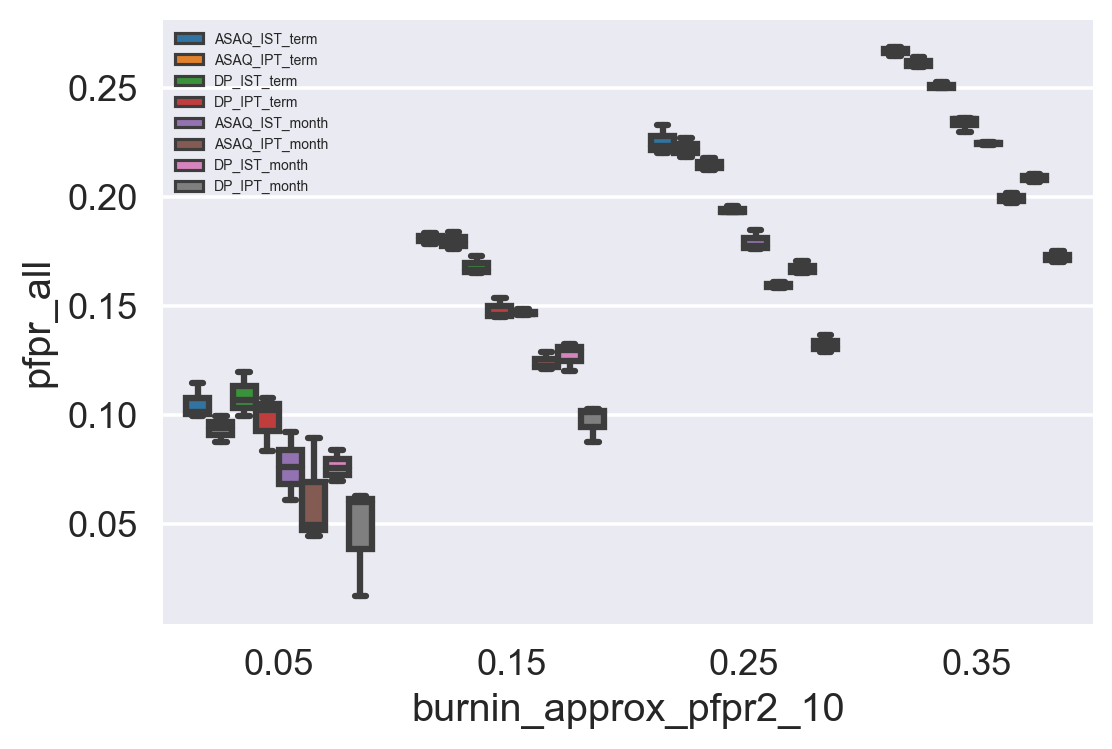

In [128]:
sdf = df[np.logical_and.reduce([df["out_of_school_rate"]==0.15,
                        df["itn_coverage"]=="default",
                        df["hs_rate"]=="default",
                               df["within_school_coverage"]==0.9])]
plt.figure(dpi=200)
hue_order = [
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "DP_IPT_term",
    "ASAQ_IST_month",
    "ASAQ_IPT_month",
    "DP_IST_month",
    "DP_IPT_month"
]
sns.boxplot(x="burnin_approx_pfpr2_10", y="pfpr_all", hue="intervention_name",data=sdf,hue_order=hue_order)
plt.legend(fontsize=5)
# plt.savefig("figures/{}_{}_{}.png".format(drug_type, interval, screen_type))
# plt.close("all")

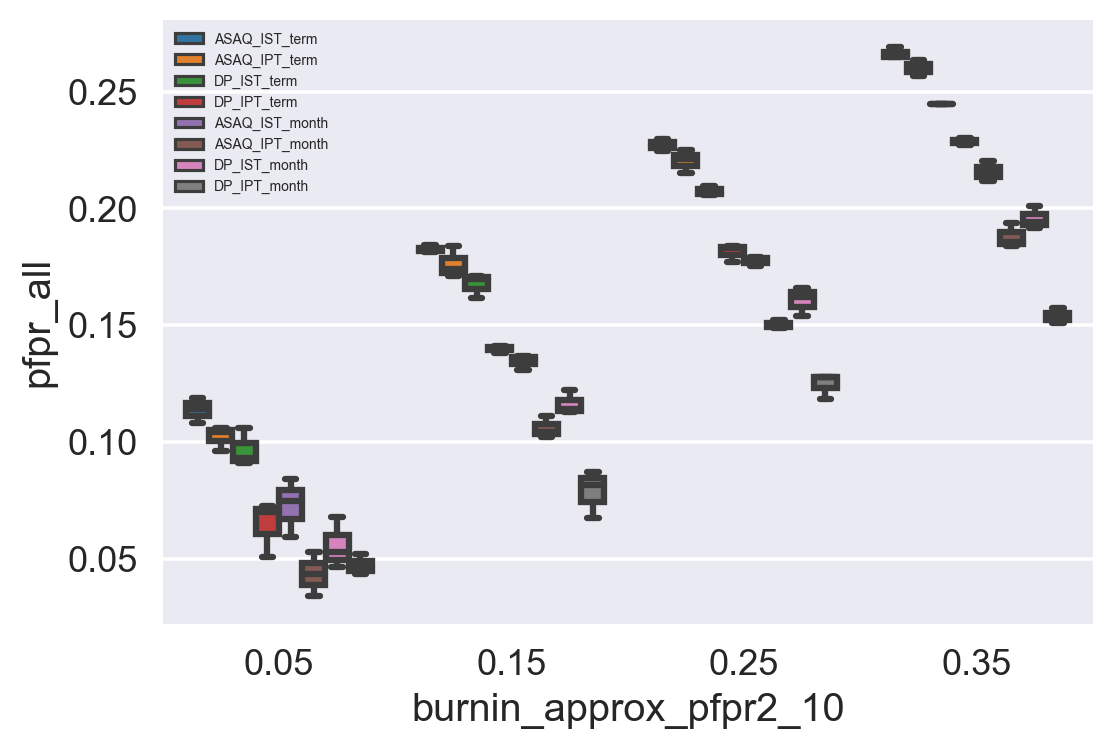

In [129]:
sdf = df[np.logical_and.reduce([df["out_of_school_rate"]==0,
                        df["itn_coverage"]=="default",
                        df["hs_rate"]=="default",
                               df["within_school_coverage"]==0.9])]
plt.figure(dpi=200)
hue_order = [
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "DP_IPT_term",
    "ASAQ_IST_month",
    "ASAQ_IPT_month",
    "DP_IST_month",
    "DP_IPT_month"
]
sns.boxplot(x="burnin_approx_pfpr2_10", y="pfpr_all", hue="intervention_name",data=sdf,hue_order=hue_order)
plt.legend(fontsize=5)
# plt.savefig("figures/{}_{}_{}.png".format(drug_type, interval, screen_type))
# plt.close("all")

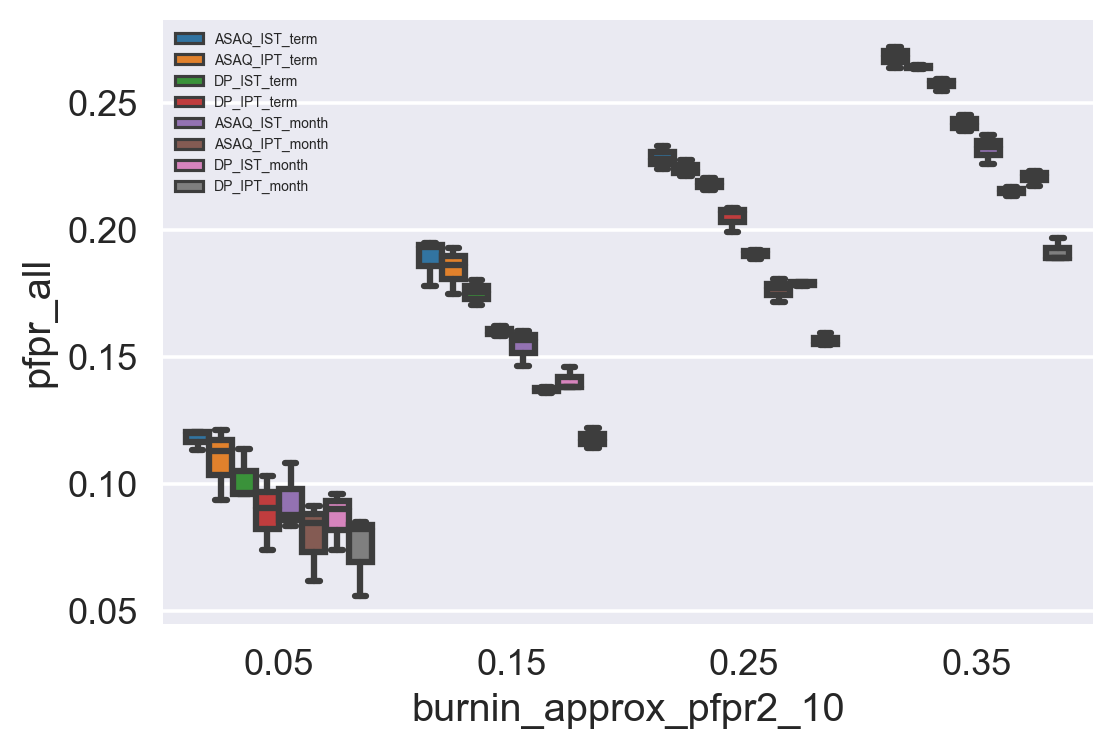

In [130]:
sdf = df[np.logical_and.reduce([df["out_of_school_rate"]==0.3,
                        df["itn_coverage"]=="default",
                        df["hs_rate"]=="default",
                               df["within_school_coverage"]==0.9])]
plt.figure(dpi=200)
hue_order = [
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "DP_IPT_term",
    "ASAQ_IST_month",
    "ASAQ_IPT_month",
    "DP_IST_month",
    "DP_IPT_month"
]
sns.boxplot(x="burnin_approx_pfpr2_10", y="pfpr_all", hue="intervention_name",data=sdf,hue_order=hue_order)
plt.legend(fontsize=5)
# plt.savefig("figures/{}_{}_{}.png".format(drug_type, interval, screen_type))
# plt.close("all")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ASAQ_IST_term'),
  Text(1, 0, 'ASAQ_IPT_term'),
  Text(2, 0, 'DP_IST_term'),
  Text(3, 0, 'DP_IPT_term'),
  Text(4, 0, 'ASAQ_IST_month'),
  Text(5, 0, 'ASAQ_IPT_month'),
  Text(6, 0, 'DP_IST_month'),
  Text(7, 0, 'DP_IPT_month')])

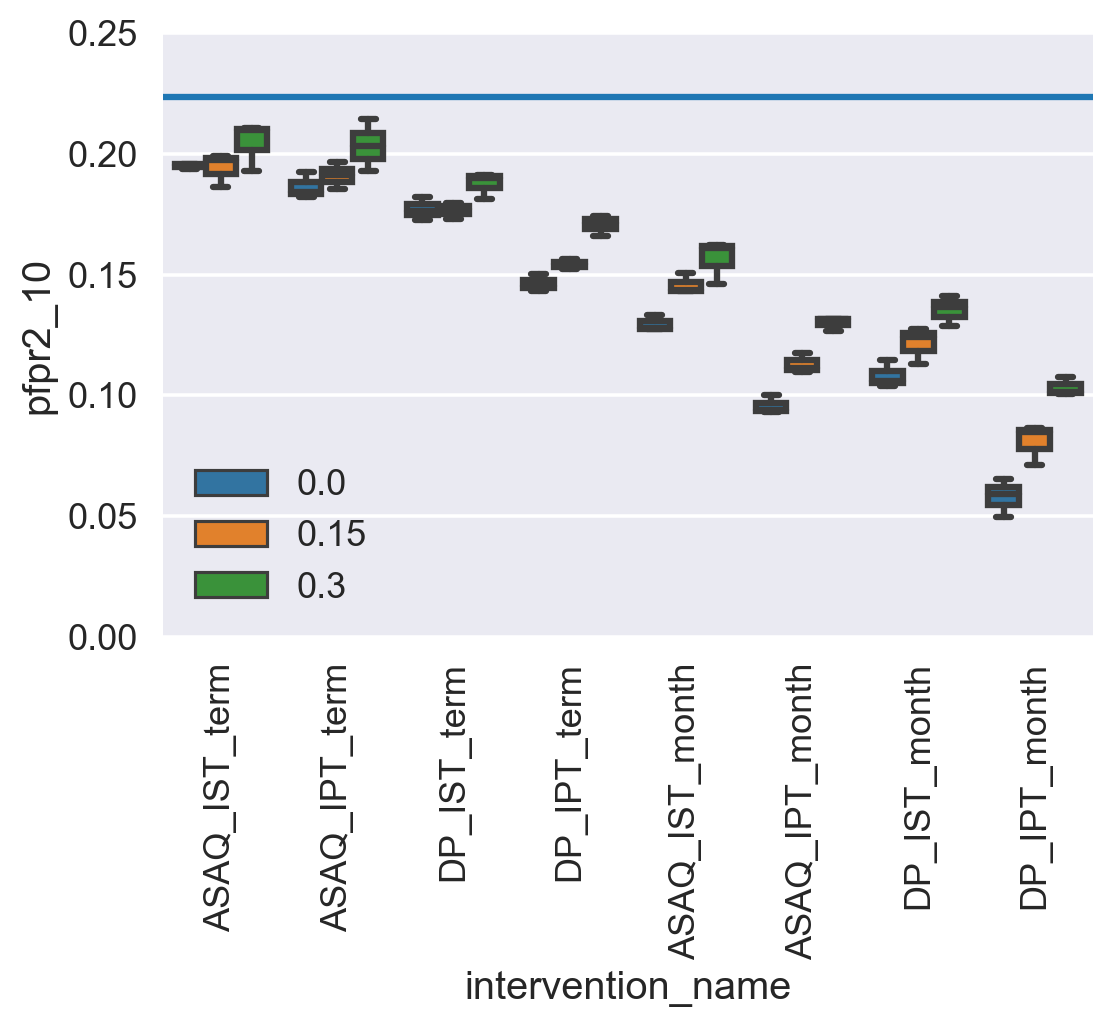

In [140]:
sdf = df[np.logical_and.reduce([df["itn_coverage"]=="default",
                        df["hs_rate"]=="default",
                               df["within_school_coverage"]==0.9,
                              df["burnin_approx_pfpr2_10"]==0.15])]
plt.figure(dpi=200)
hue_order = [
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "DP_IPT_term",
    "ASAQ_IST_month",
    "ASAQ_IPT_month",
    "DP_IST_month",
    "DP_IPT_month"
]
sns.boxplot(x="intervention_name", y="pfpr2_10", data=sdf, order=hue_order, hue="out_of_school_rate")
plt.axhline(0.223618)
plt.ylim([0,0.25])
plt.legend()
# plt.savefig("figures/{}_{}_{}.png".format(drug_type, interval, screen_type))
# plt.close("all")

plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ASAQ_IST_term'),
  Text(1, 0, 'ASAQ_IPT_term'),
  Text(2, 0, 'DP_IST_term'),
  Text(3, 0, 'DP_IPT_term'),
  Text(4, 0, 'ASAQ_IST_month'),
  Text(5, 0, 'ASAQ_IPT_month'),
  Text(6, 0, 'DP_IST_month'),
  Text(7, 0, 'DP_IPT_month'),
  Text(8, 0, 'DP_IPT_day')])

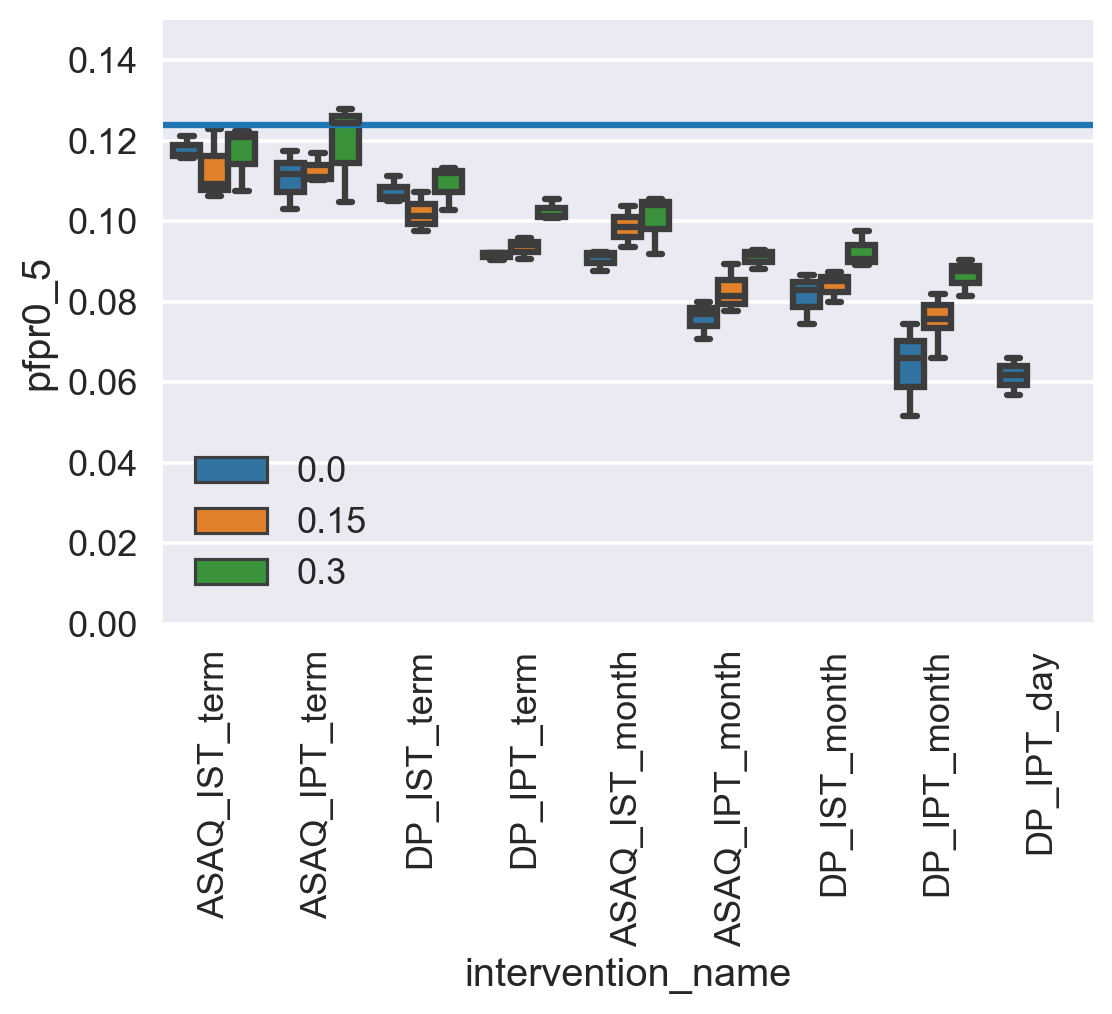

In [154]:
sdf = df[np.logical_and.reduce([df["itn_coverage"]=="default",
                        df["hs_rate"]=="default",
                               df["within_school_coverage"]>=0.9,
                              df["burnin_approx_pfpr2_10"]==0.15])]
plt.figure(dpi=200)
hue_order = [
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "DP_IPT_term",
    "ASAQ_IST_month",
    "ASAQ_IPT_month",
    "DP_IST_month",
    "DP_IPT_month",
    "DP_IPT_day"
]
sns.boxplot(x="intervention_name", y="pfpr0_5", data=sdf, order=hue_order, hue="out_of_school_rate")
plt.axhline(0.123848)
plt.ylim([0,0.15])
plt.legend()
# plt.savefig("figures/{}_{}_{}.png".format(drug_type, interval, screen_type))
# plt.close("all")

plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ASAQ_IST_term'),
  Text(1, 0, 'ASAQ_IPT_term'),
  Text(2, 0, 'DP_IST_term'),
  Text(3, 0, 'DP_IPT_term'),
  Text(4, 0, 'ASAQ_IST_month'),
  Text(5, 0, 'ASAQ_IPT_month'),
  Text(6, 0, 'DP_IST_month'),
  Text(7, 0, 'DP_IPT_month'),
  Text(8, 0, 'DP_IPT_day')])

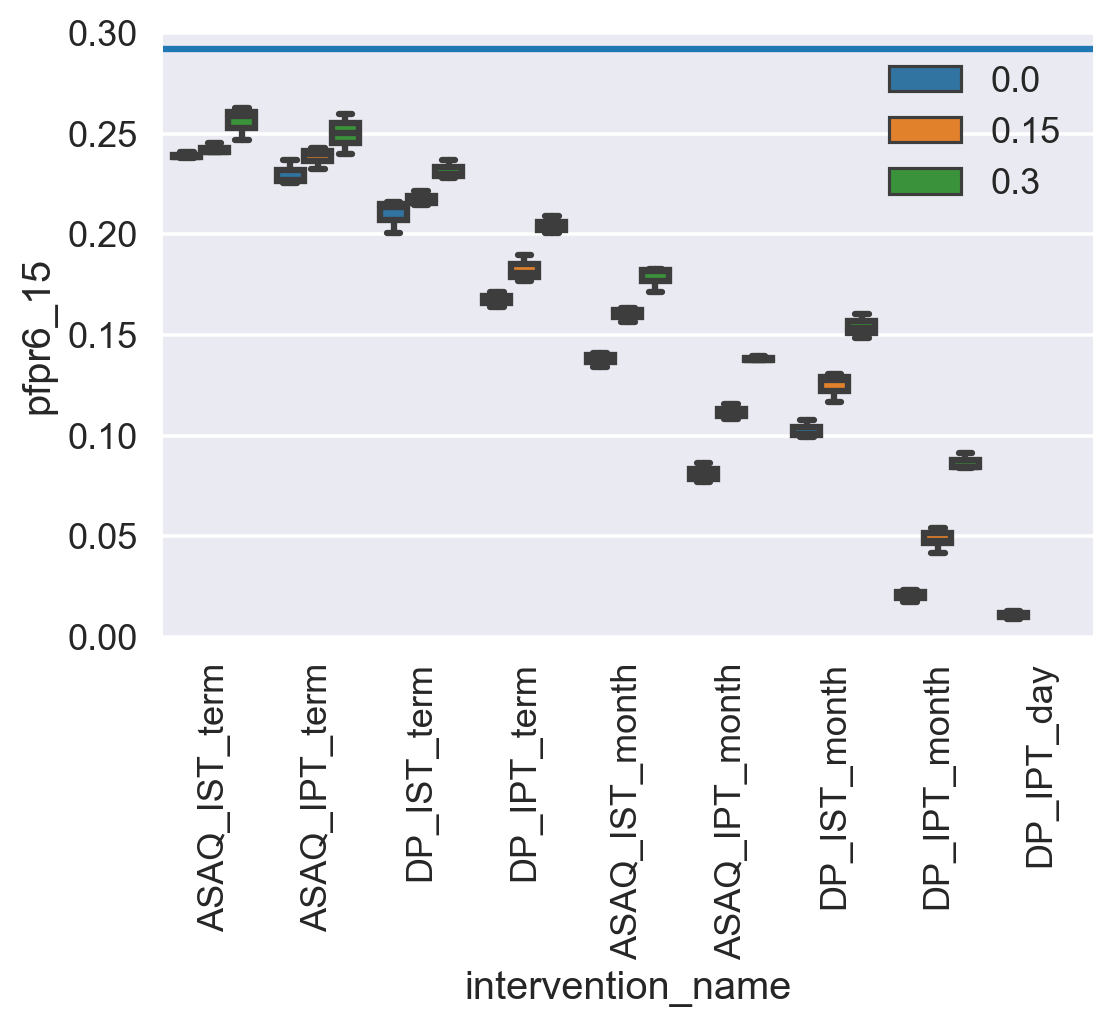

In [153]:
sdf = df[np.logical_and.reduce([df["itn_coverage"]=="default",
                        df["hs_rate"]=="default",
                               df["within_school_coverage"]>=0.9,
                              df["burnin_approx_pfpr2_10"]==0.15])]
plt.figure(dpi=200)
hue_order = [
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "DP_IPT_term",
    "ASAQ_IST_month",
    "ASAQ_IPT_month",
    "DP_IST_month",
    "DP_IPT_month",
    "DP_IPT_day"
]
sns.boxplot(x="intervention_name", y="pfpr6_15", data=sdf, order=hue_order, hue="out_of_school_rate")
plt.axhline(0.292074)
plt.ylim([0,0.3])
plt.legend()
# plt.savefig("figures/{}_{}_{}.png".format(drug_type, interval, screen_type))
# plt.close("all")

plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ASAQ_IST_term'),
  Text(1, 0, 'ASAQ_IPT_term'),
  Text(2, 0, 'DP_IST_term'),
  Text(3, 0, 'DP_IPT_term'),
  Text(4, 0, 'ASAQ_IST_month'),
  Text(5, 0, 'ASAQ_IPT_month'),
  Text(6, 0, 'DP_IST_month'),
  Text(7, 0, 'DP_IPT_month'),
  Text(8, 0, 'DP_IPT_day')])

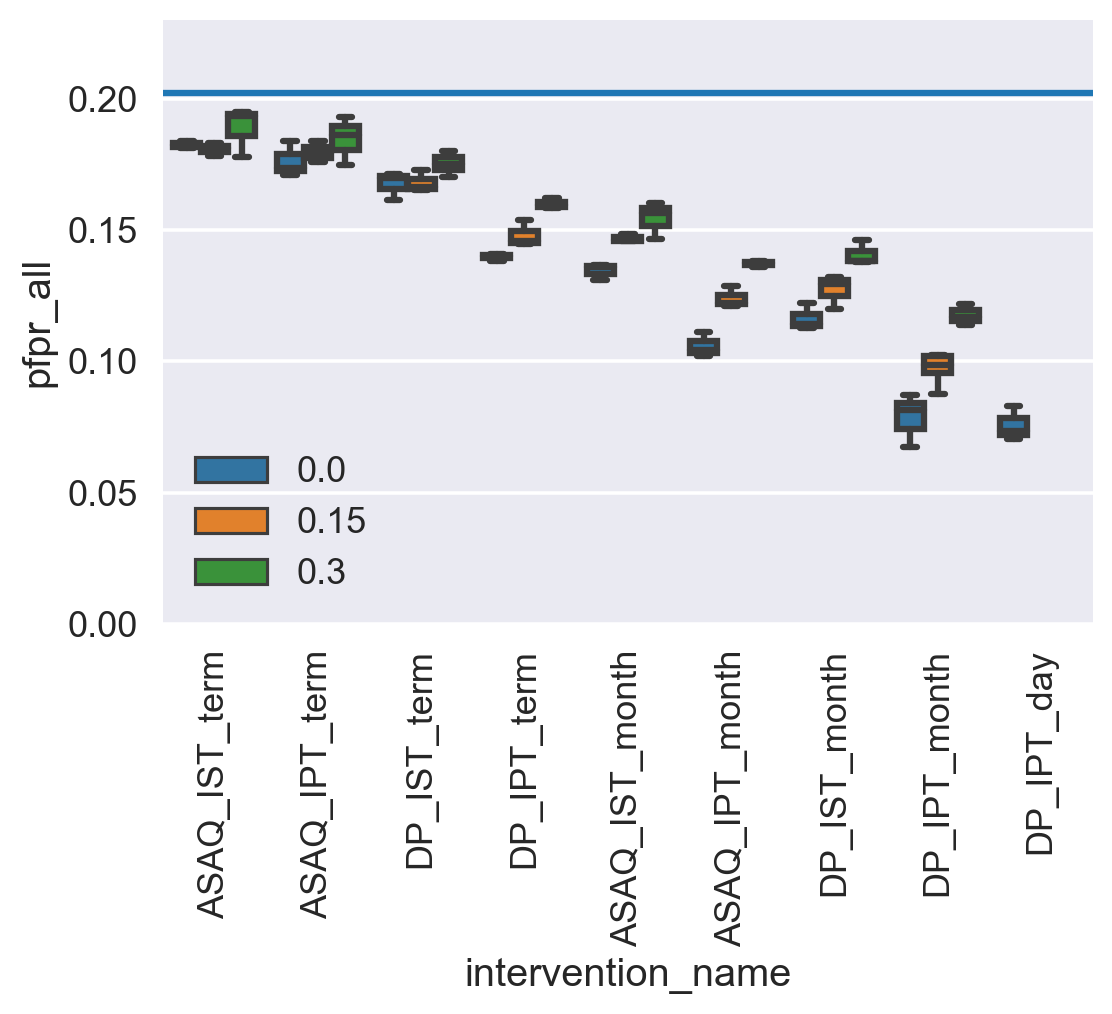

In [152]:
sdf = df[np.logical_and.reduce([df["itn_coverage"]=="default",
                        df["hs_rate"]=="default",
                               df["within_school_coverage"]>=0.9,
                              df["burnin_approx_pfpr2_10"]==0.15])]
plt.figure(dpi=200)
hue_order = [
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "DP_IPT_term",
    "ASAQ_IST_month",
    "ASAQ_IPT_month",
    "DP_IST_month",
    "DP_IPT_month",
    "DP_IPT_day"
]
sns.boxplot(x="intervention_name", y="pfpr_all", data=sdf, order=hue_order, hue="out_of_school_rate")
plt.axhline(0.202)
plt.ylim([0,0.23])
plt.legend()
# plt.savefig("figures/{}_{}_{}.png".format(drug_type, interval, screen_type))
# plt.close("all")

plt.xticks(rotation=90)


In [146]:
df_baseline

,burnin_approx_pfpr2_10,pfpr0_5,pfpr2_10,pfpr6_15,pfpr15_500,pfpr_all,annual_incidence0_5,annual_incidence2_10,annual_incidence6_15,annual_incidence15_500,...,pop0_5,pop2_10,pop6_15,pop15_500,pop_all,burnin_habitat_scale,out_of_school_rate,Run_Number,scenario_number,within_school_coverage
0,0.05,0.047026,0.106124,0.155180,0.133674,0.124428,0.817742,1.037791,1.132698,0.565008,...,799.427397,1123.863014,1088.477626,2980.780822,4997.715982,7.1,0.0,1,28,0.9
1,0.15,0.123848,0.223618,0.292074,0.185838,0.202040,2.021822,2.115604,1.914895,0.567800,...,800.229224,1164.968950,1139.091324,2937.540639,5023.595434,7.7,0.0,1,28,0.9
2,0.25,0.191972,0.309206,0.378221,0.203843,0.244494,2.968998,2.894648,2.287105,0.435347,...,812.055708,1153.631050,1087.517808,2923.341553,4968.775342,8.2,0.0,1,28,0.9
3,0.35,0.263457,0.389137,0.454796,0.219453,0.284841,4.041549,3.548617,2.474805,0.332482,...,789.352511,1135.437443,1111.891324,2938.457534,4990.544292,8.6,0.0,1,28,0.9


In [151]:
df[df["scenario_number"]==27]

,pfpr0_5,pfpr2_10,pfpr6_15,pfpr15_500,pfpr_all,annual_incidence0_5,annual_incidence2_10,annual_incidence6_15,annual_incidence15_500,annual_incidence_all,...,interval,itn_coverage,out_of_school_rate,Run_Number,scenario_number,screen_type,within_school_coverage,intervention_name,scratch,BASELINE_pfpr2_10
36,0.000031,0.000049,0.000000,0.000312,0.000196,0.000000,0.000000,0.000000,0.000000,0.000000,...,day,default,0.0,0,27,IPT,1.0,DP_IPT_day,0.000460,0.106124
75,0.056966,0.050128,0.008925,0.094730,0.070335,0.926442,0.640080,0.058555,0.262376,0.353233,...,day,default,0.0,1,27,IPT,1.0,DP_IPT_day,0.224168,0.223618
86,0.209094,0.152606,0.020406,0.169913,0.148208,3.171550,1.797243,0.094776,0.219582,0.735306,...,day,default,0.0,2,27,IPT,1.0,DP_IPT_day,0.392166,0.389137
100,0.134042,0.103525,0.013691,0.142240,0.115775,2.170263,1.321523,0.068572,0.261733,0.573025,...,day,default,0.0,0,27,IPT,1.0,DP_IPT_day,0.334810,0.309206
101,0.000037,0.000027,0.000058,0.000212,0.000145,0.000000,0.000000,0.000000,0.000000,0.000000,...,day,default,0.0,1,27,IPT,1.0,DP_IPT_day,0.000253,0.106124
107,0.008430,0.008717,0.002019,0.029324,0.019924,0.157640,0.127409,0.021946,0.098957,0.095878,...,day,default,0.0,2,27,IPT,1.0,DP_IPT_day,0.082138,0.106124
127,0.201691,0.142731,0.016716,0.169669,0.145179,3.108396,1.746542,0.082082,0.219044,0.712219,...,day,default,0.0,1,27,IPT,1.0,DP_IPT_day,0.366790,0.389137
154,0.065941,0.058735,0.012651,0.111094,0.082902,1.050972,0.722879,0.083829,0.307126,0.407892,...,day,default,0.0,2,27,IPT,1.0,DP_IPT_day,0.262657,0.223618
191,0.061940,0.051810,0.011226,0.097569,0.073570,1.037977,0.661646,0.083393,0.258861,0.368718,...,day,default,0.0,0,27,IPT,1.0,DP_IPT_day,0.231690,0.223618
315,0.131500,0.100962,0.015909,0.143073,0.116225,2.106208,1.260291,0.067252,0.276701,0.579915,...,day,default,0.0,2,27,IPT,1.0,DP_IPT_day,0.326519,0.309206


In [155]:
df_baseline

,burnin_approx_pfpr2_10,pfpr0_5,pfpr2_10,pfpr6_15,pfpr15_500,pfpr_all,annual_incidence0_5,annual_incidence2_10,annual_incidence6_15,annual_incidence15_500,...,pop0_5,pop2_10,pop6_15,pop15_500,pop_all,burnin_habitat_scale,out_of_school_rate,Run_Number,scenario_number,within_school_coverage
0,0.05,0.047026,0.106124,0.155180,0.133674,0.124428,0.817742,1.037791,1.132698,0.565008,...,799.427397,1123.863014,1088.477626,2980.780822,4997.715982,7.1,0.0,1,28,0.9
1,0.15,0.123848,0.223618,0.292074,0.185838,0.202040,2.021822,2.115604,1.914895,0.567800,...,800.229224,1164.968950,1139.091324,2937.540639,5023.595434,7.7,0.0,1,28,0.9
2,0.25,0.191972,0.309206,0.378221,0.203843,0.244494,2.968998,2.894648,2.287105,0.435347,...,812.055708,1153.631050,1087.517808,2923.341553,4968.775342,8.2,0.0,1,28,0.9
3,0.35,0.263457,0.389137,0.454796,0.219453,0.284841,4.041549,3.548617,2.474805,0.332482,...,789.352511,1135.437443,1111.891324,2938.457534,4990.544292,8.6,0.0,1,28,0.9


In [177]:
# Automate making primary figures:

def core_figures():
    # Major variations:
    for i,row in df_baseline.iterrows():
        burnin_approx_pfpr2_10 = row["burnin_approx_pfpr2_10"]
    
        sdf = df[np.logical_and.reduce([df["itn_coverage"]=="default",
                                        df["hs_rate"]=="default",
                                        df["within_school_coverage"]==0.9,
                                        df["burnin_approx_pfpr2_10"]==burnin_approx_pfpr2_10])]
        
        x_order = [
            "ASAQ_IST_term",
            "ASAQ_IPT_term",
            "DP_IST_term",
            "DP_IPT_term",
            "ASAQ_IST_month",
            "ASAQ_IPT_month",
            "DP_IST_month",
            "DP_IPT_month",
#             "DP_IPT_day"
        ]
        
        for metric in ["pfpr0_5", "pfpr6_15","pfpr15_500", "pfpr_all"]:
            
            plt.figure(dpi=300)
            sns.boxplot(x="intervention_name", y=metric, data=sdf, order=x_order, hue="out_of_school_rate")
            plt.axhline(row[metric])
            plt.ylim([0,row[metric]*1.08])
            plt.legend()
            plt.xticks(rotation=90, fontsize=8)
            plt.tight_layout()
            plt.xlabel(None)
            
            plt.savefig("figures/{}_from_baseline_pfpr2_10_of_{}.png".format(metric, burnin_approx_pfpr2_10))
            plt.close("all")
            
            
def save_major_figs():
    core_figures()
    school_coverage_figure()
    

    # Side scenarios:
    # IPT vs ITN (not run yet)
    # IPT vs HS (not run yet)
    # increasing school coverage
    # IPT at higher ITN coverage (need baseline at new ITN coverage)
    # IPT at lower HS rates (need baseline at new HS rate)

In [188]:
def itn_coverage_figure():
    for i,row in df_baseline.iterrows():
        burnin_approx_pfpr2_10 = row["burnin_approx_pfpr2_10"]
    
        sdf = df[np.logical_and(np.logical_or(df["scenario_number"]==16, df["scenario_number"]==24),
                                df["burnin_approx_pfpr2_10"]==burnin_approx_pfpr2_10)]
        
        for metric in ["pfpr0_5", "pfpr6_15","pfpr15_500", "pfpr_all"]:
            plt.figure(dpi=300)
            sns.boxplot(x="scenario_number", y=metric, data=sdf, hue="out_of_school_rate")
            plt.axhline(row[metric])
            plt.ylim([0,row[metric]*1.08])
            plt.legend()
            plt.xticks(rotation=90, fontsize=8)
            plt.tight_layout()
            plt.xlabel(None)
            
            plt.savefig("figures/itn_coverage_effect/{}_from_baseline_pfpr2_10_of_{}.png".format(metric, burnin_approx_pfpr2_10))
            plt.close("all")

In [194]:
def school_coverage_figure():
    for i,row in df_baseline.iterrows():
        burnin_approx_pfpr2_10 = row["burnin_approx_pfpr2_10"]
    
        sdf = df[np.logical_and(np.logical_or(df["scenario_number"]==16, df["scenario_number"]==26),
                                df["burnin_approx_pfpr2_10"]==burnin_approx_pfpr2_10)]
        
        for metric in ["pfpr0_5", "pfpr6_15","pfpr15_500", "pfpr_all"]:
            plt.figure(dpi=300)
            sns.boxplot(x="scenario_number", y=metric, data=sdf, hue="out_of_school_rate")
#             plt.axhline(row[metric])
            plt.ylim([0,row[metric]*1.08])
            plt.legend()
            plt.xticks(rotation=90, fontsize=8)
            plt.tight_layout()
            plt.xlabel(None)
            
            plt.savefig("figures/school_coverage_effect/{}_from_baseline_pfpr2_10_of_{}.png".format(metric, burnin_approx_pfpr2_10))
            plt.close("all")

In [195]:
school_coverage_figure()